# 作業

- 作業目標 : iris (dataset.load_iris()) 資料嘗試跑 kmeans (可以測試不同的群數 , init 等)

In [29]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

In [30]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

%matplotlib inline

In [31]:
X.shape

(150, 4)

### 載入 相關套件 並 執行 kmean 實驗 ...

- 實驗測試不同的群數
- 實驗測試不同的初始值
- 呈現結果

In [32]:
# for k_means_3_bad
mean_3 =np.mean(X, axis=0)
max_3 = np.max(X, axis=0)
min_3 = np.min(X, axis=0)

init_3_bad = np.array([mean_3,max_3,min_3])

In [33]:
init_3_bad.shape

(3, 4)

In [34]:
# for k_means_3
per75 = np.percentile(X, 75, axis=0)
per50 = np.percentile(X, 50, axis=0)
per25 = np.percentile(X, 25, axis=0)

init_3 = np.array([per75, per50, per25])

In [35]:
estimators = [
    ('k_means_3_bad', KMeans(n_clusters=3, init=init_3_bad))
    ,('k_means_3', KMeans(n_clusters=3, init=init_3))
    , ('k_means_3_auto', KMeans(n_clusters=3))
]

In [36]:
for name, estimator in estimators:
    print(estimator)

KMeans(algorithm='auto', copy_x=True,
       init=array([[5.84333333, 3.05733333, 3.758     , 1.19933333],
       [7.9       , 4.4       , 6.9       , 2.5       ],
       [4.3       , 2.        , 1.        , 0.1       ]]),
       max_iter=300, n_clusters=3, n_init=10, n_jobs=None,
       precompute_distances='auto', random_state=None, tol=0.0001, verbose=0)
KMeans(algorithm='auto', copy_x=True,
       init=array([[6.4 , 3.3 , 5.1 , 1.8 ],
       [5.8 , 3.  , 4.35, 1.3 ],
       [5.1 , 2.8 , 1.6 , 0.3 ]]),
       max_iter=300, n_clusters=3, n_init=10, n_jobs=None,
       precompute_distances='auto', random_state=None, tol=0.0001, verbose=0)
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


資料建模 並 視覺化 結果

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:969: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:969: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


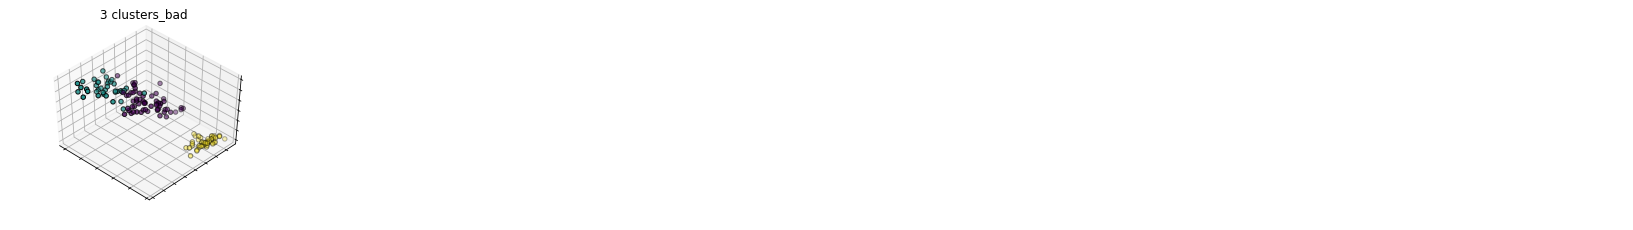

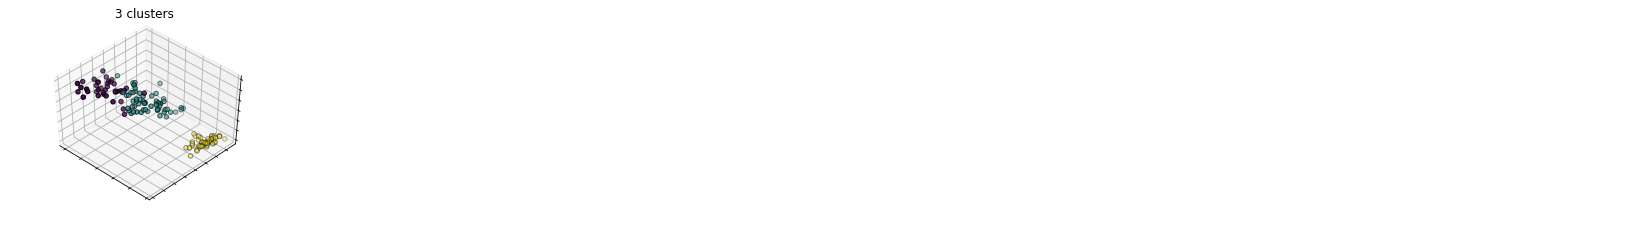

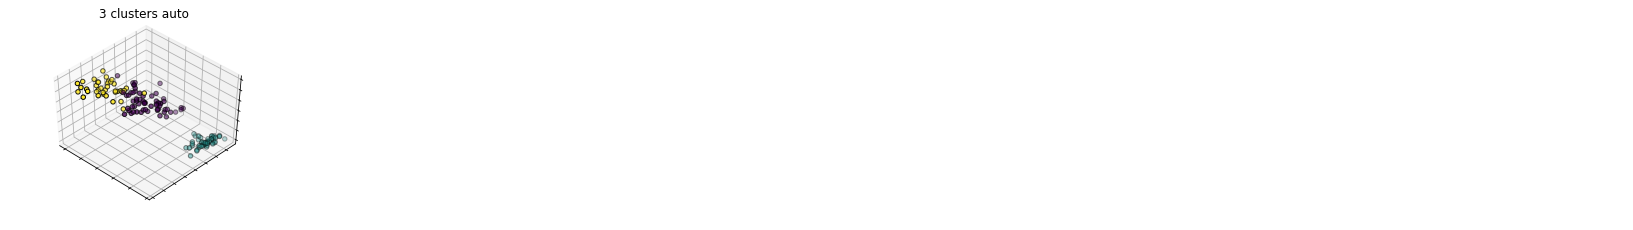

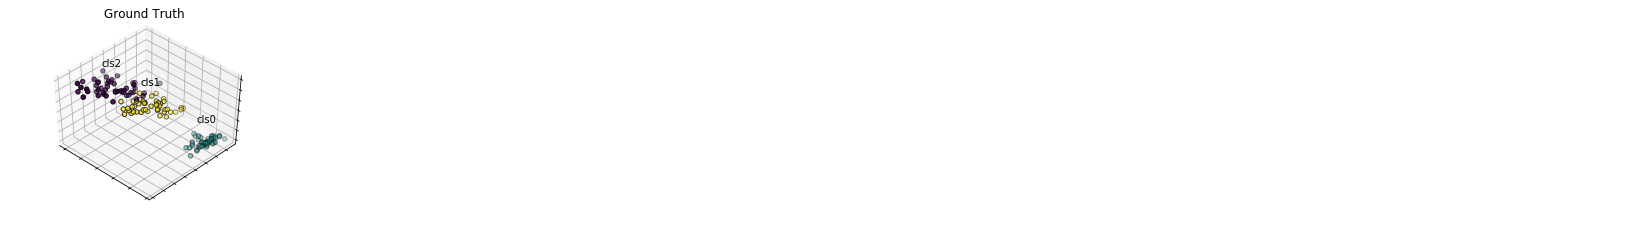

In [37]:
fignum = 1
titles = ['3 clusters_bad', '3 clusters', '3 clusters auto']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    
    ## fit data
    est.fit(X)
    
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('cls0', 0),
                    ('cls1', 1),
                    ('cls2', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_title('Ground Truth')
ax.dist = 12

#fig.show()